In [27]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

In [4]:
train_df = pd.read_csv("new_data/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("new_data/sign_mnist_test/sign_mnist_test.csv")

In [5]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']


In [6]:
label_binarizer = LabelBinarizer()

y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [7]:
x_train = train_df.values
x_test = test_df.values

x_train /= 255
x_test /= 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=11,
        zoom_range=0.11,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

In [29]:
model = Sequential()
model.add(Conv2D(75, (3,3), strides=1, padding='same', activation='swish', input_shape=(28,28,1)))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(50, (3,3), strides=1, padding='same', activation='swish'))

model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(25, (3,3), strides=1, padding='same', activation='swish'))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='swish'))

model.add(Dropout(0.25))

model.add(Dense(units=24, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_7 (Bat  (None, 14, 14, 50)       

In [32]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
215/215 [==============================] - 25s 109ms/step - loss: 0.9271 - accuracy: 0.7121 - val_loss: 4.7209 - val_accuracy: 0.0485
Epoch 2/20
215/215 [==============================] - 21s 97ms/step - loss: 0.1768 - accuracy: 0.9437 - val_loss: 1.5255 - val_accuracy: 0.4964
Epoch 3/20
215/215 [==============================] - 21s 97ms/step - loss: 0.0802 - accuracy: 0.9752 - val_loss: 0.2320 - val_accuracy: 0.9176
Epoch 4/20
215/215 [==============================] - 21s 97ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0428 - val_accuracy: 0.9868
Epoch 5/20
215/215 [==============================] - 20s 93ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.2252 - val_accuracy: 0.9198
Epoch 6/20
215/215 [==============================] - 21s 99ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0267 - val_accuracy: 0.9929
Epoch 7/20
215/215 [==============================] - 22s 101ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0089 - val_accurac

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
model.save('new-model-3.keras')

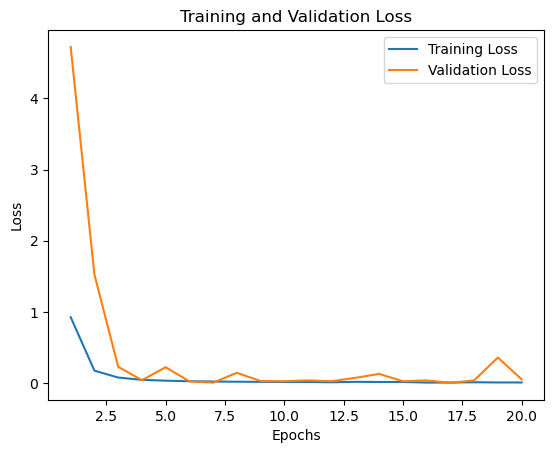

In [35]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
predictions_prob = model.predict(x_test)

# Convert probabilities to class indices
predictions = np.argmax(predictions_prob, axis=1)

# If y_test is one-hot encoded, convert it to class indices as well
y_test_classes = np.argmax(y_test, axis=1)

225/225 [==============================] - 2s 9ms/step


In [45]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, predictions)

class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',  'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

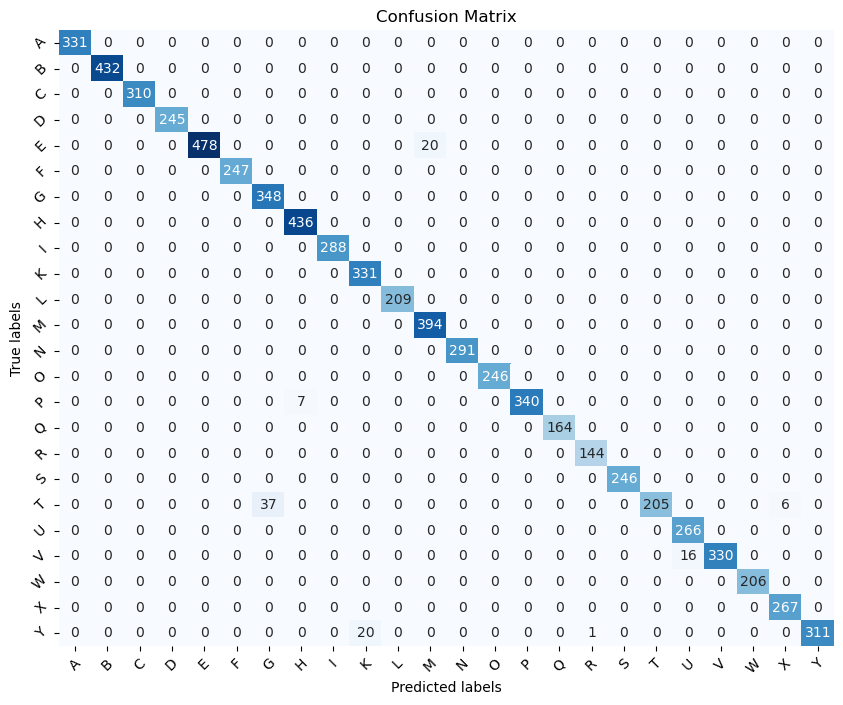

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=class_labels, yticklabels=class_labels)  # Use class_labels here
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)  # Optional: Rotate labels for better readability
plt.yticks(rotation=45)  # Optional: Rotate labels for better readability
plt.show()
